In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pylab as pylab
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import matplotlib.ticker as mtick
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/franciscoperez/anacon

In [2]:
'''data2d_gaussian=pd.read_csv('23-05-2022-2d_gaussian-RRLyrae.csv')
data2d_uniform =pd.read_csv('23-05-2022-2D-uniform-RRLyrae.csv')
data1d_period =pd.read_csv('23-05-2022-1D-period-RRLyrae.csv')
datal1 = pd.read_csv('27-07-2022-l1-baseline-RRLyrae.csv')
datal2 = pd.read_csv('28-07-2022-l2-baseline-RRLyrae.csv')
data1d_amplitude =pd.read_csv('25-04-2022-results1D-sample.csv')
dropout =pd.read_csv('(baseline-dropout)05-05-2022-results1D.csv')'''

"data2d_gaussian=pd.read_csv('23-05-2022-2d_gaussian-RRLyrae.csv')\ndata2d_uniform =pd.read_csv('23-05-2022-2D-uniform-RRLyrae.csv')\ndata1d_period =pd.read_csv('23-05-2022-1D-period-RRLyrae.csv')\ndatal1 = pd.read_csv('27-07-2022-l1-baseline-RRLyrae.csv')\ndatal2 = pd.read_csv('28-07-2022-l2-baseline-RRLyrae.csv')\ndata1d_amplitude =pd.read_csv('25-04-2022-results1D-sample.csv')\ndropout =pd.read_csv('(baseline-dropout)05-05-2022-results1D.csv')"

In [3]:
data2d_gaussian=pd.read_csv('30-05-2022-2d_gaussian-RRLyrae.csv')
data2d_uniform =pd.read_csv('30-05-2022-2D-uniform-RRLyrae.csv')
data1d_period =pd.read_csv('30-05-2022-1D-period-RRLyrae.csv')
datal1 = pd.read_csv('27-07-2022-l1-baseline-RRLyrae.csv')
datal2 = pd.read_csv('28-07-2022-l2-baseline-RRLyrae.csv')
data1d_amplitude =pd.read_csv('30-05-2022-1D-amplitude-RRLyrae.csv')
dropout =pd.read_csv('30-05-2022-(dropout)-baseline-RRLyrae.csv')
baseline = pd.read_csv('30-05-2022-baseline-RRLyrae.csv')

In [4]:
data2d_gaussian.loc[data2d_gaussian['aux_loss_activated']==True, 'aux_loss_activated'] = '2D-Gaussian'
data2d_uniform.loc[data2d_uniform['aux_loss_activated']==True, 'aux_loss_activated'] = '2D-uniform'
data1d_period.loc[data1d_period['aux_loss_activated']==True, 'aux_loss_activated'] = '1D-period'
datal1.loc[datal1['aux_loss_activated']==True, 'aux_loss_activated'] = 'L1'
datal2.loc[datal2['aux_loss_activated']==True, 'aux_loss_activated'] = 'L2'
data1d_amplitude.loc[data1d_amplitude['aux_loss_activated']==True, 'aux_loss_activated'] = '1D-amplitude'
dropout.loc[dropout['aux_loss_activated']==False, 'aux_loss_activated'] = 'Dropout'
baseline.loc[baseline['aux_loss_activated']==False, 'aux_loss_activated'] = 'Baseline'

In [5]:
data = pd.concat([baseline, data2d_gaussian])#baseline, data2d_gaussian, data2d_uniform, data1d_period])

In [6]:
data = data[data.n<100000]

In [7]:
data['f1_test'] = data['f1_test']*100
data['recall_test'] = data['recall_test']*100
data['f1_train'] = data['f1_train']*100
data['recall_train'] = data['f1_train']*100

In [8]:
index = 'acc_test'
method1 = 'Baseline'
method2 = '2D-Gaussian'


0
1
2


/home/franciscoperez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator


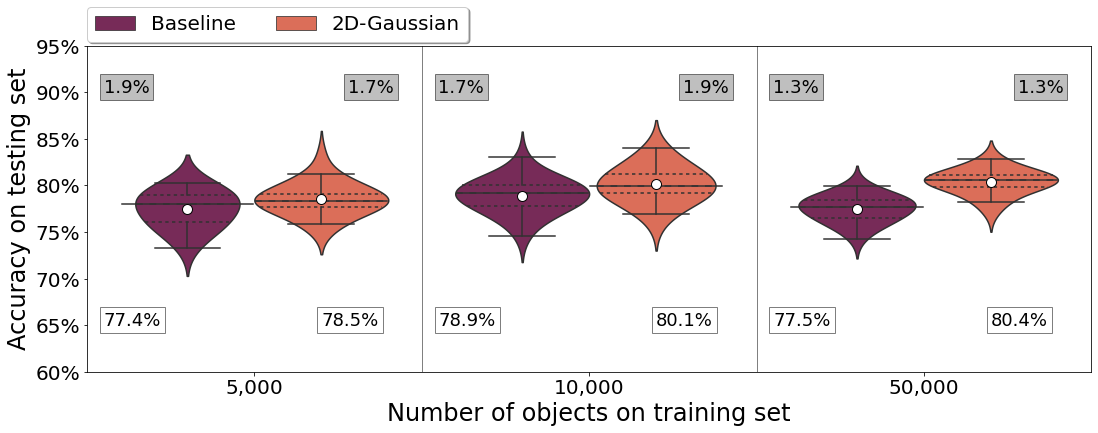

In [9]:
plt.figure(figsize=(18,6))
plt.ylim(60,95)
sns.boxplot(x="n", y=index, palette='rocket', hue='aux_loss_activated',showmeans=True, showfliers=False, showbox=False, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot( x="n",bw=0.8, y=index,inner="quartile", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
yposlist = data[(data.aux_loss_activated==method2) ].groupby(['n'])[index].mean().tolist()
yposlist_false = data[(data.aux_loss_activated==method1) ].groupby(['n'])[index].mean().tolist()
xposlist = range(len(yposlist))
stringlist = [str(i) for i in np.round(yposlist,1)]
xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in np.round(yposlist_false,1)]
for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.2, 65, '{}%'.format(stringlist[i]),size=18, bbox=dict(facecolor='white', alpha=0.5))    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, 65, '{}%'.format(stringlist_false[i]),size=18, bbox=dict(facecolor='white', alpha=0.5))

yposlist = data[(data.aux_loss_activated==method2) ].groupby(['n'])[index].std().tolist()
yposlist_false = data[(data.aux_loss_activated==method1) ].groupby(['n'])[index].std().tolist()
xposlist = range(len(yposlist))
stringlist = [str(i) for i in np.round(yposlist,1)]
xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in np.round(yposlist_false,1)]
for i in range(len(stringlist)):
    print(xposlist[i])
    ax.text(xposlist[i]+0.28, 90, '{}%'.format(stringlist[i]),size=18, bbox=dict(facecolor='gray', alpha=0.5))    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, 90, '{}%'.format(stringlist_false[i]),size=18, bbox=dict(facecolor='gray', alpha=0.5))

for i in range(len(np.unique(data['n'])) - 1):
    ax.axvline(i + 0.5, color='grey', lw=1)
    
handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[0:2], labels[0:2],fontsize = 20, bbox_to_anchor= (-0.01, 1, 0.5, 0.15), ncol=2, title_fontsize = 18, shadow = True, facecolor = 'white', loc=2);
ax.set_xlabel("Number of objects on training set",fontsize=24)
ax.set_ylabel("Accuracy on testing set",fontsize=24)
ax.tick_params(labelsize=20)
ax.set_yticklabels(['{}%'.format(int(x)) for x in ax.get_yticks()])
current_values = plt.gca().get_xticks()
ax.set_xticklabels(['{:,.0f}'.format(x) for x in [5000, 10000, 50000]])
plt.savefig('gaussian2d.svg', format='svg', bbox_inches='tight')


0
1
2


/home/franciscoperez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator


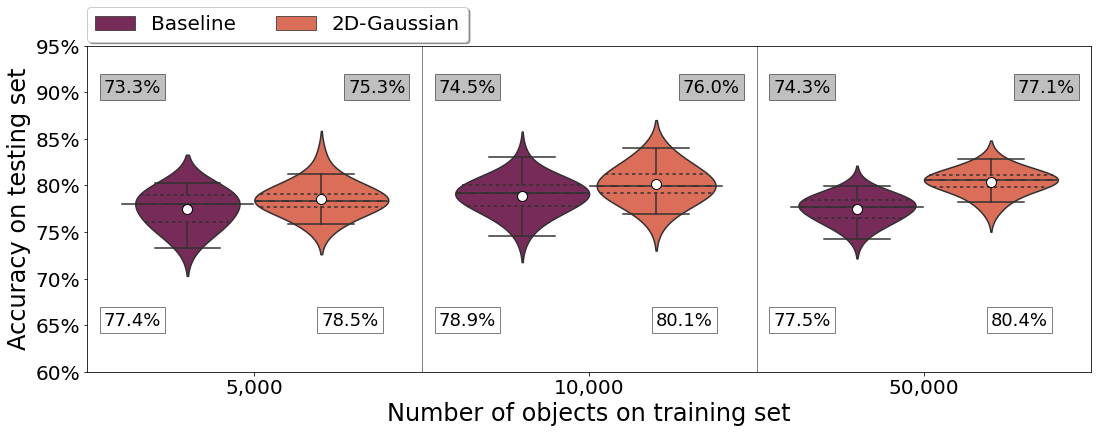

In [10]:
plt.figure(figsize=(18,6))
plt.ylim(60,95)
sns.boxplot(x="n", y=index, palette='rocket', hue='aux_loss_activated',showmeans=True, showfliers=False, showbox=False, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot( x="n",bw=0.8, y=index,inner="quartile", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
yposlist = data[(data.aux_loss_activated==method2) ].groupby(['n'])[index].mean().tolist()
yposlist_false = data[(data.aux_loss_activated==method1) ].groupby(['n'])[index].mean().tolist()
xposlist = range(len(yposlist))
stringlist = [str(i) for i in np.round(yposlist,1)]
xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in np.round(yposlist_false,1)]
for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.2, 65, '{}%'.format(stringlist[i]),size=18, bbox=dict(facecolor='white', alpha=0.5))    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, 65, '{}%'.format(stringlist_false[i]),size=18, bbox=dict(facecolor='white', alpha=0.5))

yposlist = data[(data.aux_loss_activated==method2) ].groupby(['n'])[index].min().tolist()
yposlist_false = data[(data.aux_loss_activated==method1) ].groupby(['n'])[index].min().tolist()
xposlist = range(len(yposlist))
stringlist = [str(i) for i in np.round(yposlist,1)]
xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in np.round(yposlist_false,1)]
for i in range(len(stringlist)):
    print(xposlist[i])
    ax.text(xposlist[i]+0.28, 90, '{}%'.format(stringlist[i]),size=18, bbox=dict(facecolor='gray', alpha=0.5))    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, 90, '{}%'.format(stringlist_false[i]),size=18, bbox=dict(facecolor='gray', alpha=0.5))

for i in range(len(np.unique(data['n'])) - 1):
    ax.axvline(i + 0.5, color='grey', lw=1)
    
handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[0:2], labels[0:2],fontsize = 20, bbox_to_anchor= (-0.01, 1, 0.5, 0.15), ncol=2, title_fontsize = 18, shadow = True, facecolor = 'white', loc=2);
ax.set_xlabel("Number of objects on training set",fontsize=24)
ax.set_ylabel("Accuracy on testing set",fontsize=24)
ax.tick_params(labelsize=20)
ax.set_yticklabels(['{}%'.format(int(x)) for x in ax.get_yticks()])
current_values = plt.gca().get_xticks()
ax.set_xticklabels(['{:,.0f}'.format(x) for x in [5000, 10000, 50000]])
plt.savefig('gaussian2d.svg', format='svg', bbox_inches='tight')


In [11]:
current_values

array([0, 1, 2])

In [17]:
data2d_gaussian=pd.read_csv('30-05-2022-2d_gaussian-RRLyrae.csv')
data2d_uniform =pd.read_csv('30-05-2022-2D-uniform-RRLyrae.csv')
data1d_period =pd.read_csv('30-05-2022-1D-period-RRLyrae.csv')
datal1 = pd.read_csv('27-07-2022-l1-baseline-RRLyrae.csv')
datal2 = pd.read_csv('28-07-2022-l2-baseline-RRLyrae.csv')
data1d_amplitude =pd.read_csv('30-05-2022-1D-amplitude-RRLyrae.csv')
dropout =pd.read_csv('30-05-2022-(dropout)-baseline-RRLyrae.csv') 
baseline = pd.read_csv('30-05-2022-baseline-RRLyrae.csv')
data = pd.concat([baseline, data2d_gaussian])
data = data[data.n<100000]

In [18]:
from scipy import stats
from scipy.stats import wilcoxon, ttest_ind, ttest_rel, shapiro, kstest

for n in data.n.unique():
    samples1 = data[(data.aux_loss_activated==False) & (data.n==n)].roc_test.to_list()
    samples2 = data[(data.aux_loss_activated==True) & (data.n==n)].roc_test.to_list()
    print(n)
    print(np.mean(samples1))
    print(np.mean(samples2))
    print(np.median(samples1))
    print(np.median(samples2))
    
    print(shapiro(samples1))
    print(shapiro(samples2))
    stat, p = kstest(samples1, samples2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

    
        

5000
0.8398590527689346
0.8502314542518329
0.8433458273254033
0.8482788556530194
ShapiroResult(statistic=0.9431182146072388, pvalue=0.11037768423557281)
ShapiroResult(statistic=0.9853407740592957, pvalue=0.9428432583808899)
Statistics=0.333, p=0.071
Same distribution (fail to reject H0)
10000
0.8505173181299944
0.8600955137678314
0.8497701937572129
0.8615474119744349
ShapiroResult(statistic=0.9747351408004761, pvalue=0.6749249696731567)
ShapiroResult(statistic=0.9658436179161072, pvalue=0.4325301945209503)
Statistics=0.400, p=0.016
Different distribution (reject H0)
50000
0.8513640605058422
0.8759130660139155
0.85326719887532
0.875083748286331
ShapiroResult(statistic=0.9681378602981567, pvalue=0.48956286907196045)
ShapiroResult(statistic=0.9772990345954895, pvalue=0.750103235244751)
Statistics=0.833, p=0.000
Different distribution (reject H0)


In [20]:
data2d_gaussian.loc[data2d_gaussian['aux_loss_activated']==True, 'aux_loss_activated'] = '2D-gaussian'
data2d_uniform.loc[data2d_uniform['aux_loss_activated']==True, 'aux_loss_activated'] = '2D-uniform'
data1d_period.loc[data1d_period['aux_loss_activated']==True, 'aux_loss_activated'] = '1D-period'
datal1.loc[datal1['aux_loss_activated']==True, 'aux_loss_activated'] = 'L1'
datal2.loc[datal2['aux_loss_activated']==True, 'aux_loss_activated'] = 'L2'
data1d_amplitude.loc[data1d_amplitude['aux_loss_activated']==True, 'aux_loss_activated'] = '1D-amplitude'
dropout.loc[dropout['aux_loss_activated']==False, 'aux_loss_activated'] = 'Dropout'
baseline.loc[baseline['aux_loss_activated']==False, 'aux_loss_activated'] = 'Baseline'
data = pd.concat([baseline, data1d_amplitude, data2d_gaussian, dropout])
data = data[data.n<100000]

90
90
90
90


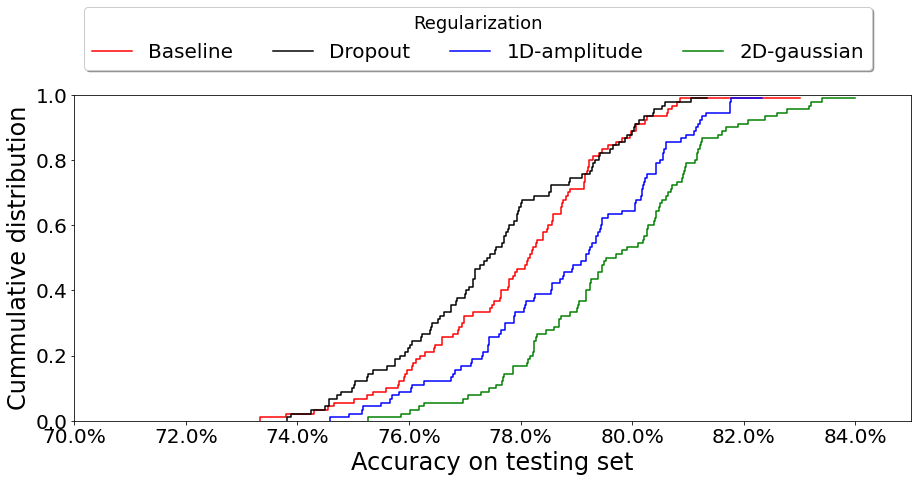

In [29]:
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15,6))
losses = ['Baseline', 'Dropout','1D-amplitude', '2D-gaussian']

colors = ['red', 'black', 'blue', 'green' ]
# Iterate through the five airlines
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]['acc_test']
    #data = np.random.randn(1000)
    print(subset.shape[0])
    sorted_data = np.sort(subset)  # Or data.sort(), if data can be modified

    # Cumulative counts:
    plt.step(sorted_data, np.arange(sorted_data.size)/subset.shape[0], color=colors[i], label=loss)  # From 0 to the number of data points-1
    #plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

    #plt.show()
    i=i+1
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=subset.shape[0]))
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_xlabel("Accuracy on testing set",fontsize=24)
ax.set_ylabel("Cummulative distribution",fontsize=24)


plt.legend(title = "Regularization", prop={'size':20},
           loc='upper left', bbox_to_anchor= (0.0, 1.1, 0.5, 0.2),
           ncol=4, title_fontsize = 18, shadow = True, facecolor = 'white')

ax.tick_params(labelsize=20)



#plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_test'].max(), ymin=0., ymax=1, color='red', linestyle='dashed')
#plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_test'].max(), ymin=0, ymax=1, color='black', linestyle='dashed')




plt.xlim(70,85)
plt.ylim(0,1)
plt.show()






In [31]:
sorted_data.shape

(90,)

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

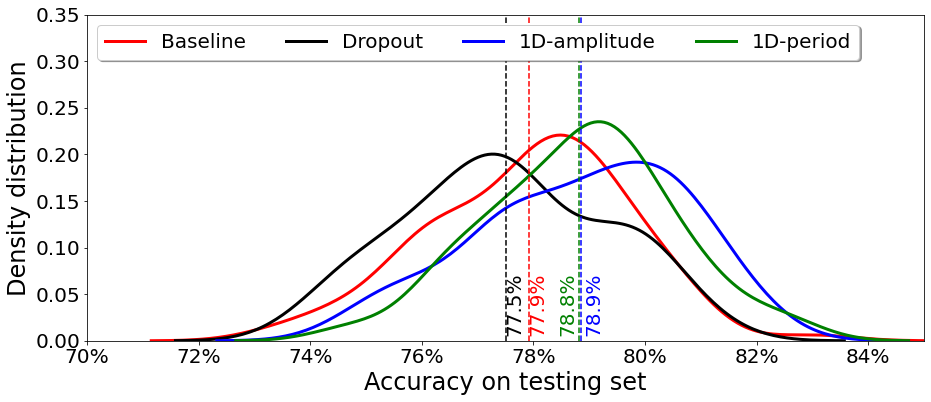

In [16]:
fig, ax = plt.subplots(figsize=(15,6))

i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(70,85)
plt.xlabel('Accuracy on testing set',fontsize=24)
plt.ylabel('Density distribution',fontsize=24)
plt.legend( prop={'size':20},
           loc='upper left',
           ncol=4, title_fontsize = 18, shadow = True, facecolor = 'white')



plt.axvline(x=data[(data.aux_loss_activated=='Baseline')]['acc_test'].mean(), ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated=='Dropout')]['acc_test'].mean(), ymin=0, ymax=1, color='black', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated=='1D-amplitude')]['acc_test'].mean(), ymin=0, ymax=1, color='blue', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated=='1D-period')]['acc_test'].mean(), ymin=0, ymax=1, color='green', linestyle='dashed')

#['None', 'dropout','1D-amplitude', '1D-period']
mean1 = np.round(data[data.aux_loss_activated=='Baseline']['acc_test'].mean(),1)
mean2 = np.round(data[data.aux_loss_activated=='Dropout']['acc_test'].mean(),1)
mean3 = np.round(data[data.aux_loss_activated=='1D-amplitude']['acc_test'].mean(),1)
mean4 = np.round(data[data.aux_loss_activated=='1D-period']['acc_test'].mean(),1)

plt.text(mean1+0.01, 0.01,'{}%'.format(str(mean1)),rotation=90, fontsize=20, color='red')
plt.text(mean2-0.01, 0.01,'{}%'.format(str(mean2)),rotation=90, fontsize=20, color='black')
plt.text(mean3+0.01, 0.01,'{}%'.format(str(mean3)),rotation=90, fontsize=20, color='blue')
plt.text(mean4-0.35, 0.01,'{}%'.format(str(mean4)),rotation=90, fontsize=20, color='green')

fmt = '%.0f%%'
xticks = matplotlib.ticker.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.tick_params(labelsize=20)
plt.ylim(0, 0.35)
plt.savefig('performance_profile2.svg', format='svg', bbox_inches='tight')